In [1]:
# Import what you need
from sklearn import preprocessing
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Log Transformation

In [2]:
# Set the data
data = pd.DataFrame ({
'X' : [94,74,147,58,86,94,63,86,69,72,128,85,82,86,88,72,74,61,90,89,68,76,114,90,78],
'y' : [130,51,640,28,80,110,33,90,36,38,366,84,80,83,70,61,54,44,106,84,39,42,197,102,57]
})

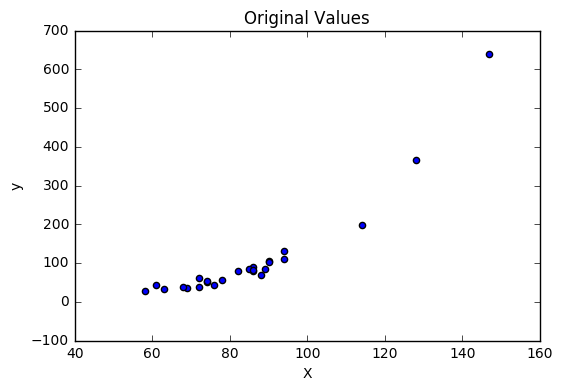

In [3]:
# Original Data Plot
data.plot(kind='scatter', color='Blue', x='X', y='y', title='Original Values')
plt.show()

In [4]:
# Get the linear models
lm_original = np.polyfit(data.X, data.y, 1)
lm_original

array([   5.90235434, -393.26402468])

In [5]:
# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_original[0] + lm_original[1]) for i in data.X))
 
# Put in to a data frame, to keep is all nice
lm_original_plot = pd.DataFrame({'X' : r_x,'y' : r_y})

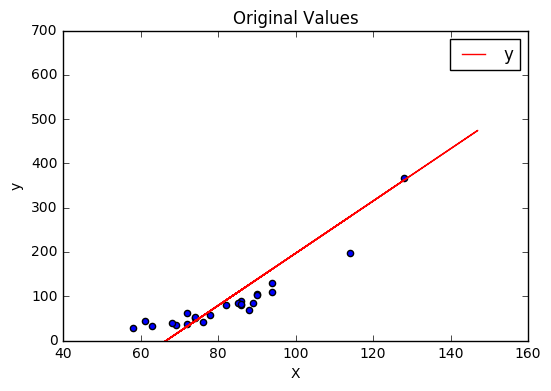

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1)

data.plot(kind='scatter', color='Blue', x='X', y='y', ax=axes, title='Original Values')
lm_original_plot.plot(kind='line', color='Red', x='X', y='y', ax=axes)
plt.ylim([0,700])
plt.xlim([40,160])
plt.show()

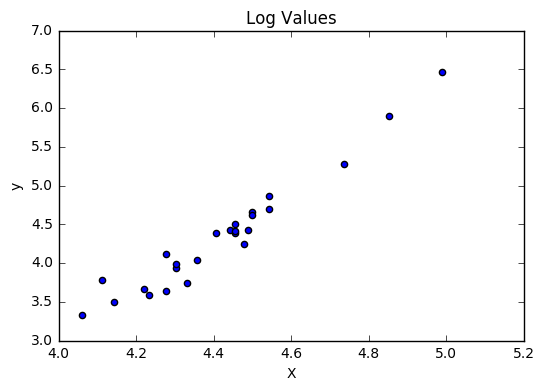

In [7]:
# create another data frame of log values
data_log = np.log(data)
# Log Data Plot
data_log.plot(kind='scatter', color='Blue', x='X', y='y', title='Log Values')
plt.show()

In [8]:
# Get the linear models
lm_log = np.polyfit(data_log.X, data_log.y, 1)
 
# calculate the y values based on the co-efficients from the model
r_x, r_y = zip(*((i, i*lm_log[0] + lm_log[1]) for i in data_log.X))
 
# Put in to a data frame, to keep is all nice
lm_log_plot = pd.DataFrame({'X' : r_x,'y' : r_y})

print lm_log

[  3.28599334 -10.17460123]


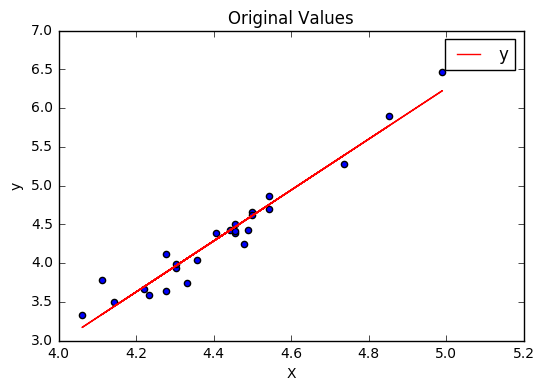

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1)

data_log.plot(kind='scatter', color='Blue', x='X', y='y', ax=axes, title='Original Values')
lm_log_plot.plot(kind='line', color='Red', x='X', y='y', ax=axes)
plt.ylim([3,7])
plt.xlim([4,5.2])
plt.show()

# Box-Cox Transformation 

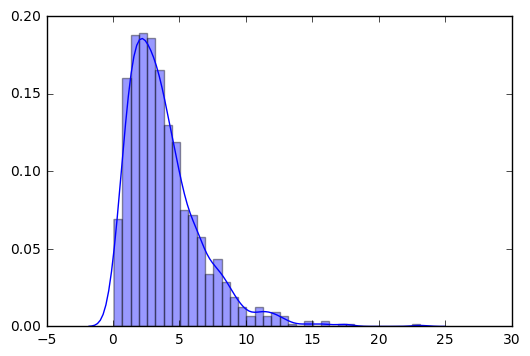

In [10]:
x = np.random.gamma(2, 2, 1000) #shape越大會越接近normal
fig, axes = plt.subplots(nrows=1, ncols=1)
sns.distplot(x)
plt.show()

In [11]:
boxcox_x, lmbda = stats.boxcox(x)
lmbda

0.30422172329843605

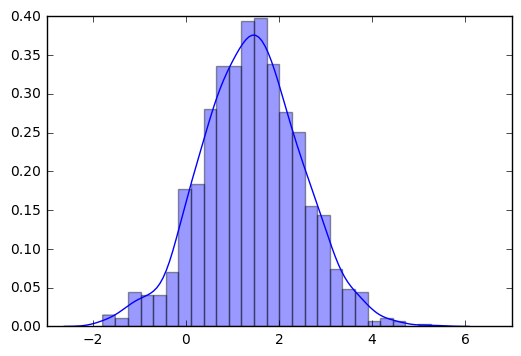

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1)
sns.distplot(boxcox_x)
plt.show()

# Normalization

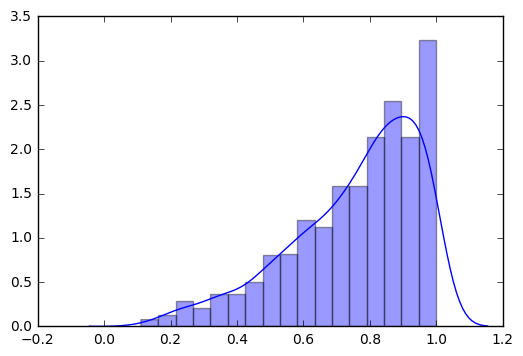

In [13]:
x = np.random.beta(3, 1, 1000) 
fig, axes = plt.subplots(nrows=1, ncols=1)
sns.distplot(x)
plt.show()

In [14]:
my_scaler = preprocessing.scale(x)
print my_scaler.mean(axis=0)
print my_scaler.var(axis=0)

5.68434188608e-17
1.0


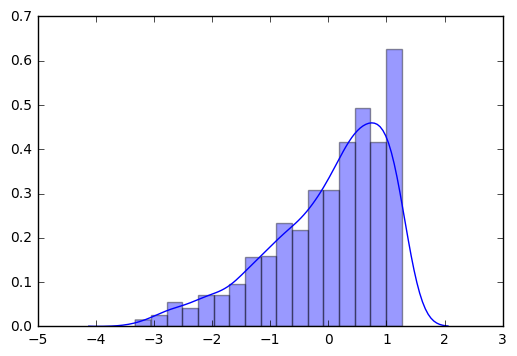

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1)
sns.distplot(my_scaler)
plt.show()

# Normalization with PCA 

In [32]:
features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30)

In [33]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [34]:
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
77.78%


Prediction accuracy for the standardized test dataset with PCA
98.15%



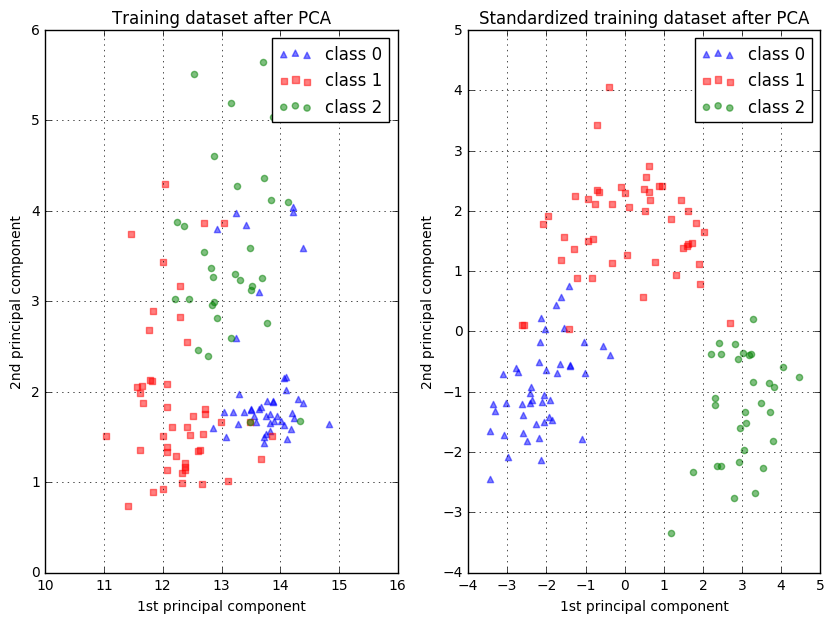

In [35]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.show()